In [145]:
from math import sqrt, pi
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [146]:
# Pauli-X Gate : Switches amplification of |0>, |1>
qc = QuantumCircuit(1)
qc.x(0)

In [147]:
qc.draw()

┌───┐
q: ┤ X ├
   └───┘

In [148]:
qc.save_statevector()
qobj = assemble(qc)

In [149]:
sim = Aer.get_backend('aer_simulator')
state = sim.run(qobj).result().get_statevector()

/var/folders/zp/ml21rpn93ld15w6gxd9g29j80000gn/T/ipykernel_22253/1864001737.py:2: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  state = sim.run(qobj).result().get_statevector()


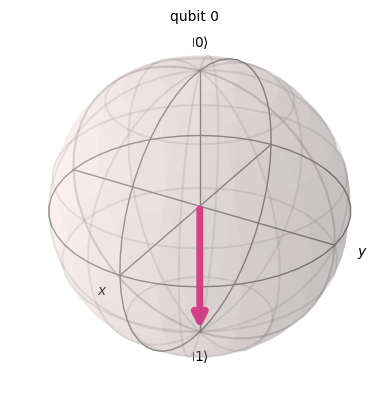

In [150]:
plot_bloch_multivector(state)

In [151]:
# Pauli - Y gate & Pauli - Z gate
qc.y(0)
qc.z(0)
qc.draw()

┌───┐ statevector ┌───┐┌───┐
q: ┤ X ├──────░──────┤ Y ├┤ Z ├
   └───┘      ░      └───┘└───┘

In [152]:
#hadamard gate: helps in moving away from the pole and creating superpositions.
def x_measure(qh,qubit, cbit):
    qh.h(qubit)
    qh.measure(qubit, cbit)
    return qh
qh = QuantumCircuit(1,1)
initial_state = [1/sqrt(2),-1/sqrt(2)]
qc.initialize(initial_state,0)
x_measure(qh,0,0)
qh.draw()


┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0

/var/folders/zp/ml21rpn93ld15w6gxd9g29j80000gn/T/ipykernel_22253/677256454.py:3: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  state = sim.run(qhobj).result().get_statevector()


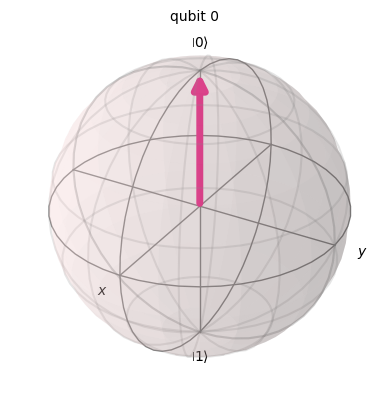

In [153]:
qh.save_statevector()
qhobj = assemble(qh)
state = sim.run(qhobj).result().get_statevector()
plot_bloch_multivector(state)

/var/folders/zp/ml21rpn93ld15w6gxd9g29j80000gn/T/ipykernel_22253/4037542649.py:1: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  counts = sim.run(qhobj).result().get_counts()


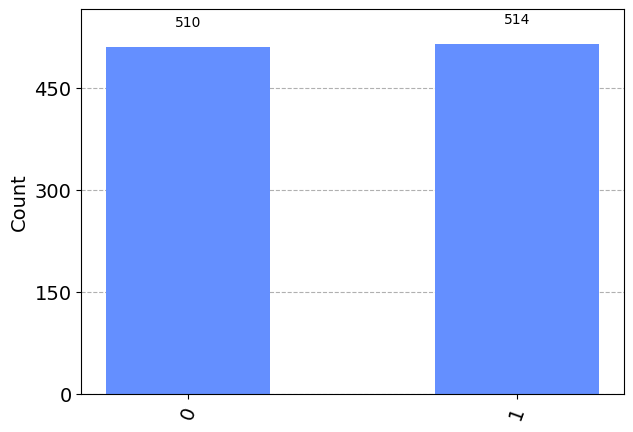

In [154]:
counts = sim.run(qhobj).result().get_counts()
plot_histogram(counts)

In [155]:
#p-gate: parametrized: performs rotation about the z-basis.
qp = QuantumCircuit(1)
initial_state = [1/sqrt(2),1/sqrt(2)]
qp.initialize(initial_state,0)
qp.p(pi/4,0)
qp.draw()

┌─────────────────────────────┐┌────────┐
q: ┤ Initialize(0.70711,0.70711) ├┤ P(π/4) ├
   └─────────────────────────────┘└────────┘

/var/folders/zp/ml21rpn93ld15w6gxd9g29j80000gn/T/ipykernel_22253/134631264.py:3: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  state = sim.run(qpobj).result().get_statevector()


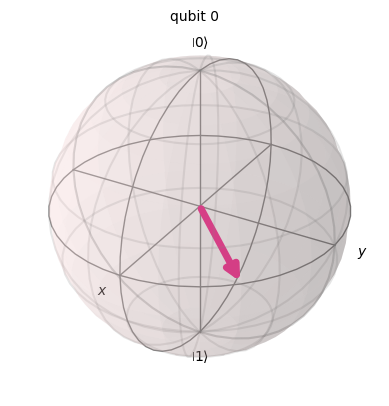

In [156]:
qp.save_statevector()
qpobj = assemble(qp)
state = sim.run(qpobj).result().get_statevector()
plot_bloch_multivector(state)

In [157]:
#s-gate: p(pi/2): conducts a quarter turn around the bloch sphere.
qc = QuantumCircuit(1)
qc.s(0)
qc.sdg(0)
qc.draw()

┌───┐┌─────┐
q: ┤ S ├┤ Sdg ├
   └───┘└─────┘

In [158]:
#T-gate: p(pi/4): conducts a quarter turn around the bloch sphere.
qc = QuantumCircuit(1)
qc.t(0)
qc.tdg(0)
qc.draw()

┌───┐┌─────┐
q: ┤ T ├┤ Tdg ├
   └───┘└─────┘

In [162]:
#universal gate
qc = QuantumCircuit(1)
qc.u(pi/2,0,pi,0)
qc.draw()

┌────────────┐
q: ┤ U(π/2,0,π) ├
   └────────────┘

/var/folders/zp/ml21rpn93ld15w6gxd9g29j80000gn/T/ipykernel_22253/95441611.py:3: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  state = sim.run(qobj).result().get_statevector()


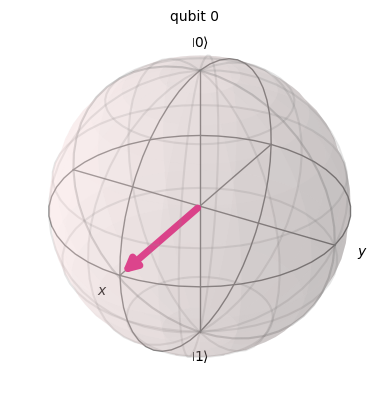

In [163]:
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)